In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as a3d
%matplotlib inline

In [2]:
b_norms = np.asarray(
  [[-1.0, 0.0, 0.0],
  [0.0, -1.0, 0.0],
  [-0.347252784,  -0.782219564,	0.517250479],
  [0.393457551, 0.541547875,	0.742911202],
  [0.636627669,0.206852872,	-0.742911233],
  [0.347252811,0.782219525,	-0.517250519],
  [0.851239679,-0.502239228,	0.152140616],
  [0.740705521,-0.654376459,	-0.152140661],
  [0.347250266,-0.112828417,	0.930960257],
  [0.214610424,0.96477748,	-0.152140661],
  [0.214612459,-0.295388659,	-0.930960274],
  [0.740710551,0.428718814,	0.517250479],
  [0.74071057,-0.428718733,	-0.517250519],
  [0.214612457,0.295388714,	0.930960257],
  [0.636627941,0.571976193,	-0.517250519],
  [0.393458463,0.90666624,	0.152140616],
  [-8.47266E-09,0.365120484,	-0.930960274],
  [4.65998E-08,-0.66938998,	0.742911202],
  [0.851239626,0.502239303,	-0.152140661],
  [0.636628012,-0.57197615,	0.517250479],
  [0.347250215,	0.112828436,	-0.930960274],
  [0.636627721,	-0.206852824,	0.742911202],
  [0.740705466,	0.654376532,	0.152140616],
  [0.347252893,	-0.782219515,	0.517250479],
  [0.393458544,	-0.906666197,	-0.152140661],
  [0.983876179,	0.094025976,	-0.152140661],
  [0.214610515,	-0.964777466,	0.152140616],
  [0.983876194,	-0.094025886,	0.152140616],
  [0.178843722,	-0.836938961,	-0.517250519],
  [0.851242003,	-0.088537859,	-0.517250519],
  [0.851242019,	0.08853794,	0.517250479],
  [-0.983876181,	-0.094026023,	0.152140616],
  [-0.214610381,	-0.964777496,	0.152140616],
  [-0.983876183,	0.094025931,	-0.152140661],
  [-0.178843606,	-0.836938985,	-0.517250519],
  [-0.851241991,	-0.088537977,	-0.517250519],
  [-0.34725022,	0.11282842,	-0.930960274],
  [2.5418E-08,	-0.365120527,	0.930960257],
  [-0.740705496,	0.654376498,	0.152140616],
  [-0.393458418,	-0.906666252,	-0.152140661],
  [-1.55333E-08,	0.669389946,	-0.742911233],
  [-0.740710511,	-0.428718836,	-0.517250519],
  [-0.636627932,	-0.571976239,	0.517250479],
  [-0.85123965,	0.502239263,	-0.152140661],
  [-0.393457505,	-0.541547866,	-0.742911233],
  [-0.636627692,	-0.206852912,	0.742911202],
  [-0.214612471,	0.295388704,	0.930960257],
  [-0.636627968,	0.571976163,	-0.517250519],
  [-0.740710571,	0.428718779,	0.517250479],
  [-0.393458505,	0.906666222,	0.152140616],
  [-0.851239609,	-0.502239346,	0.152140616],
  [-0.34725025,	-0.112828466,	0.930960257],
  [-0.636627678,	0.206852842,	-0.742911233],
  [-0.74070543,	-0.654376562,	-0.152140661],
  [-0.214612418,	-0.295388689,	-0.930960274],
  [-0.851242023,	0.088537901,	0.517250479],
  [-0.178843689,	0.836938992,	0.517250479],
  [-0.214610469,	0.96477747,	-0.152140661],
  [-0.393457576,	0.541547857,	0.742911202],
  [-0.347252847,	0.782219509,	-0.517250519]]
)


In [16]:
bigR = 3
rays = []
R = 1
m = 5
dR = R / m

for b0 in b_norms:
    xb, yb, zb = bigR * b0
    
    if b0[0] == 0 and b0[1] == 0:
        e1 = np.asarray([1, 0, 0])
        
    elif b0[0] == 0 and b0[2] == 0:
        e1 = np.asarray([0, 1, 0])
        
    elif b0[1] == 0 and b0[2] == 0:
        e1 = np.asarray([0, 0, 1])
        
    elif b0[0] == 0:
        e1 = np.asarray([xb, dR + yb, zb - (b0[1] / b0[2]) * (dR + yb)])
        
    elif b0[1] == 0:
        e1 = np.asarray([dR + xb, yb, zb - (b0[0] / b0[2]) * (dR + xb)])
        
    elif b0[2] == 0:
        e1 = np.asarray([dR + xb, yb - (b0[0] / b0[1]) * (dR + xb), zb])
    
    else:
        e1 = np.asarray([dR + xb, yb, zb - (b0[0] / b0[2]) * (dR + xb)])
        
    e1 = e1 / np.linalg.norm(e1)
    e2 = np.cross(b0, e1)
    
    ray = []
    for i in range(1, m + 1):
        r = i * dR
        n = np.rint(np.pi / np.arcsin(1 / (2 * i))).astype(int)

        for j in range(n + 1):
            theta = j * (2 * np.pi) / (n)
            xr = xb + r * np.cos(theta) * e1[0] + r * np.sin(theta) * e2[0]
            yr = yb + r * np.cos(theta) * e1[1] + r * np.sin(theta) * e2[1]
            zr = zb + r * np.cos(theta) * e1[2] + r * np.sin(theta) * e2[2]

            ray.append([xr, yr, zr])
        rays.append(ray)

rays = np.asarray(rays)

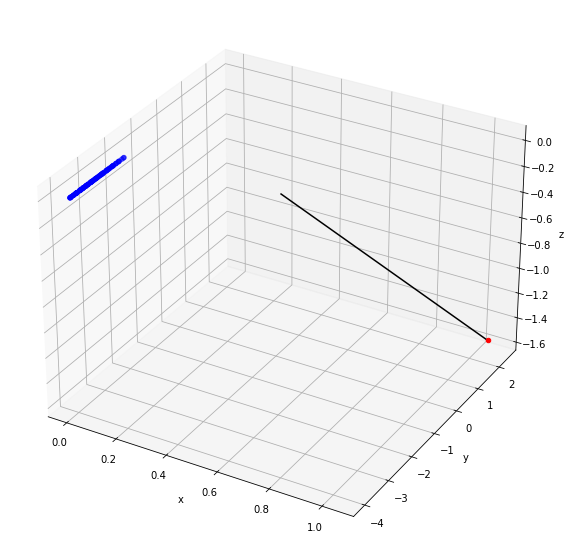

In [26]:
bnum = 5
beam = bigR * b_norms[bnum, :]
b_rays = rays[bnum, :, :]

line = np.linspace(R, 2 * R + m * dR, 100)
beam_line = np.asarray([b_norms[bnum, :] for i in range(100)]) * line[:, None]

# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal')
# ax.scatter(beam[0], beam[1])
# ax.scatter(b_rays[:, 0], b_rays[:, 1])

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(beam_line[:, 0], beam_line[:, 1], beam_line[:, 2], color='k')
ax.scatter(beam[0], beam[1], beam[2] , color='r')
ax.scatter(b_rays[:, 0], b_rays[:, 1], b_rays[:, 2], color='b')

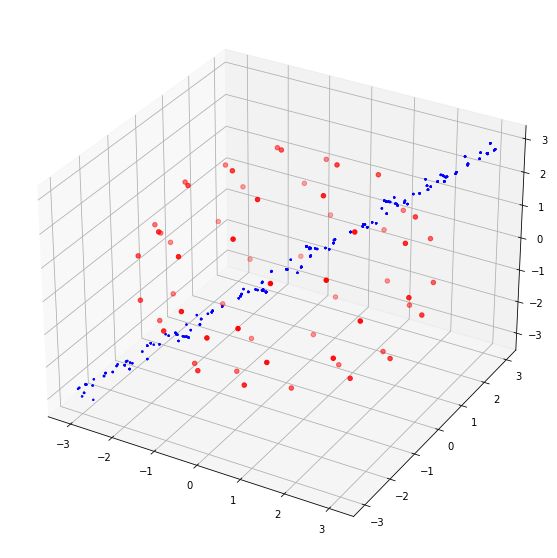

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bigR * b_norms[:, 0], bigR * b_norms[:, 1], bigR * b_norms[:, 2], color='r', s=20)
ax.scatter(rays[:, 0], rays[:, 1], rays[:, 2], color='b', s=2)